In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wbgapi as wb
import scipy.stats as stats
import seaborn as sb

In [33]:
#tracing the indicator id and the country names respect to the country codes
indicator_id = ['AG.LND.ARBL.ZS','AG.LND.FRST.ZS']
country_code = ['AUS','CHN','CAN','BEL','IND','ZAF','CHL','SRB','MDV','MEX','ITA','DEU']
country_name = {'AUS':'Austalia','CHN':'China','CAN':'Canada','BEL':'Belgium','IND':'India',
                'ZAF':'South Africa','CHL':'Chile','SRB':'Serbia','MDV':'Maldives','MEX':'Mexico',
                'ITA':'Italy','DEU':'Germany'}

In [34]:
#taking the datasets
wb.series.info(indicator_id)

id,value
AG.LND.ARBL.ZS,Arable land (% of land area)
AG.LND.FRST.ZS,Forest area (% of land area)
,2 elements


# Dataset with years as coloumns

In [5]:
#percentage of arable land area
a = pd.DataFrame(wb.data.DataFrame('AG.LND.ARBL.ZS',time=range(2000,2016)))
a
'''cleaning the dataset'''
data1 = a.dropna()
data1

,YR2000,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,YR2009,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015
economy,,,,,,,,,,,,,,,,
ABW,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111,11.111111
AFE,6.032334,6.046716,6.124416,6.282424,6.435512,6.528305,6.562551,6.629741,6.842997,7.000949,7.072272,7.716099,8.144944,8.189016,8.246972,8.249165
AFG,11.768220,11.768220,11.760561,11.904543,11.971939,11.955090,11.938241,11.938241,11.938241,11.936709,11.936709,11.933646,11.932114,11.924455,11.903011,11.893821
AFW,9.803577,9.710773,9.922647,10.253695,10.118501,10.359529,10.430154,10.584573,10.726906,10.377477,10.613389,10.786094,11.033062,11.113984,11.113469,11.113469
AGO,2.406353,2.406353,2.486565,2.646988,2.646988,2.646988,2.646988,2.727200,2.727200,3.208470,3.288682,3.769953,3.769953,3.930376,3.930376,3.930376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WSM,4.946996,4.946996,4.593640,4.593640,4.240283,3.886926,3.674912,3.533569,3.180212,2.791519,4.240283,5.653710,7.067138,8.480565,9.893993,11.469965
YEM,2.926303,2.776673,2.680077,2.371347,2.509612,2.437639,2.602421,2.585374,2.358089,2.217929,2.445215,2.198989,2.280433,2.274750,2.184973,2.154668
ZAF,11.385800,11.281109,11.293474,11.211040,10.963737,10.860695,10.386698,10.386698,10.551567,10.436159,10.331468,9.919297,9.892094,9.892094,9.892094,9.892094


# Dataset with countries as coloumns

In [6]:
#percentage of forest land area
b = pd.DataFrame(wb.data.DataFrame('AG.LND.FRST.ZS',time=range(2000,2016)))
b
'''cleaning the dataset'''
x = b.dropna()
x

,YR2000,YR2001,YR2002,YR2003,YR2004,YR2005,YR2006,YR2007,YR2008,YR2009,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015
economy,,,,,,,,,,,,,,,,
ABW,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333,2.333333
AFE,33.980631,38.903980,38.703207,38.502435,37.899951,37.701120,37.502465,37.303880,37.105259,36.906596,31.910878,32.183135,31.972492,31.761842,31.551270,31.340526
AFG,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994,1.850994
AFW,21.595284,21.503156,21.411029,21.318902,21.226775,21.134648,21.042520,20.950393,20.858266,20.766139,20.674012,20.586055,20.498099,20.410143,20.322187,20.234231
AGO,62.331443,61.886219,61.440995,60.995770,60.550546,60.105322,59.660098,59.214874,58.769649,58.324425,57.879201,57.433976,56.988751,56.543526,56.098301,55.653076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WSM,60.533569,60.363251,60.192933,60.022615,59.852297,59.681979,59.511661,59.341343,59.171025,59.000707,58.830389,58.659364,58.488339,58.317314,58.146290,57.975265
YEM,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832,1.039832
ZAF,14.655211,14.625205,14.595199,14.565193,14.535187,14.505181,14.475175,14.445169,14.415163,14.385157,14.355151,14.325145,14.295139,14.265133,14.235127,14.205121


In [7]:
'''transposing the dataset'''
data2 = x.T
data2

economy,ABW,AFE,AFG,AFW,AGO,ALB,AND,ARB,ARE,ARG,...,VGB,VIR,VNM,VUT,WLD,WSM,YEM,ZAF,ZMB,ZWE
YR2000,2.333333,33.980631,1.850994,21.595284,62.331443,28.076642,34.042553,3.002028,4.356942,12.196486,...,24.466667,58.485714,37.883688,36.283839,31.170690,60.533569,1.039832,14.655211,63.296520,47.475714
YR2001,2.333333,38.903980,1.850994,21.503156,61.886219,28.123248,34.042553,1.720474,4.368023,12.080871,...,24.446667,57.902857,38.395628,36.283839,31.135820,60.363251,1.039832,14.625205,63.248362,47.356624
YR2002,2.333333,38.703207,1.850994,21.411029,61.440995,28.169854,34.042553,1.718538,4.379104,11.965257,...,24.426667,57.320000,38.978883,36.283839,31.101204,60.192933,1.039832,14.595199,63.200204,47.237534
YR2003,2.333333,38.502435,1.850994,21.318902,60.995770,28.216460,34.042553,1.716630,4.390186,11.849643,...,24.406667,56.737143,39.556513,36.283839,31.066090,60.022615,1.039832,14.565193,63.152047,47.118444
YR2004,2.333333,37.899951,1.850994,21.226775,60.550546,28.263066,34.042553,1.714696,4.401267,11.734029,...,24.386667,56.154286,40.073803,36.283839,31.031363,59.852297,1.039832,14.535187,63.103889,46.999354
YR2005,2.333333,37.701120,1.850994,21.134648,60.105322,28.309672,34.042553,1.712759,4.412349,11.618415,...,24.366667,55.571429,40.591092,36.283839,30.996238,59.681979,1.039832,14.505181,63.055731,46.880264
YR2006,2.333333,37.502465,1.850994,21.042520,59.660098,28.356277,34.042553,1.710812,4.423430,11.502801,...,24.346667,54.988571,41.108382,36.283839,30.971231,59.511661,1.039832,14.475175,63.007573,46.761174
YR2007,2.333333,37.303880,1.850994,20.950393,59.214874,28.402883,34.042553,1.708872,4.434511,11.387187,...,24.326667,54.405714,41.625672,36.283839,30.945030,59.341343,1.039832,14.445169,62.959416,46.642083
YR2008,2.333333,37.105259,1.850994,20.858266,58.769649,28.449489,34.042553,1.706934,4.445593,11.271573,...,24.306667,53.822857,42.142961,36.283839,30.922605,59.171025,1.039832,14.415163,62.911258,46.522993
YR2009,2.333333,36.906596,1.850994,20.766139,58.324425,28.496095,34.042553,1.705377,4.456674,11.155958,...,24.286667,53.240000,42.660251,36.283839,30.896748,59.000707,1.039832,14.385157,62.863100,46.403903


In [10]:
#Functions neccessary
def readData(file_id,country_codes):
    file = pd.DataFrame(wb.data.DataFrame(file_id, country_codes, time=range(2000, 2015)))
    file_tr = file.transpose()
    return file, file_tr
'''functions to find the mean,median,mode,standard deviation and variance'''
def statProp(data):
    mean = data.mean
    median = data.median
    mode = data.mode
    std = np.std(data)
    var = np.var(data)
    
    print(f'Mean : {mean}, Median : {median}, Mode : {mode}, variance : {var}, standerd devidation : {std}')

In [11]:
arb_land, arb_land_data = readData('AG.LND.ARBL.ZS',country_code)
frst_land, frst_land_data = readData('AG.LND.FRST.ZS',country_code)

# Mean and Variance of Arable Land area

In [12]:
mean = {}
var = {}
for i in arb_land_data:
    mean[i] = arb_land_data[i].mean()
    var[i] = arb_land_data[i].var()

'''Total mean and variance'''
mean_total_arb = arb_land_data.stack().mean()
var_total_arb = arb_land_data.stack().var()

arb_mean = sorted(mean, key = mean.get, reverse = True)[:6]
arb_var = sorted(var, key = var.get, reverse = True)[:6]


In [13]:
# Total mean of the dataset
print(f'The total mean of whole data is {round(mean_total_arb,2)}')
print('')

'''total mean and the top 6 countries with highest mean'''
print(f'The top 6 countries with highest mean in arable land area are :')
for i in range(6):
    print(f'{country_name[arb_mean[i]]} with {round(mean[arb_mean[i]],2)}')


The total mean of whole data is 18.47

The top 6 countries with highest mean in arable land area are :
India with 53.29
Germany with 34.02
Serbia with 29.9
Belgium with 27.56
Italy with 25.45
China with 12.82


In [14]:
# Total variance of the dataset
print(f'The total variance of whole data is {round(var_total_arb,2)}')
print('')

'''total variance  and the top 6 countries with highest variance'''
print(f'The top 6 countries with highest variance in arable land area are :')
for i in range(6):
    print(f'{country_name[arb_var[i]]} with {round(var[arb_var[i]],2)}')


The total variance of whole data is 222.36

The top 6 countries with highest variance in arable land area are :
Italy with 4.3
Maldives with 2.57
Mexico with 0.6
South Africa with 0.31
India with 0.28
Belgium with 0.23


# Mean and Variance of Forest Land area

In [17]:
mean = {}
var = {}
for i in frst_land_data:
    mean[i] = frst_land_data[i].mean()
    var[i] = frst_land_data[i].var()

'''total mean and variance'''
mean_total_frst = frst_land_data.stack().mean()
var_total_frst = frst_land_data.stack().var()

frst_mean = sorted(mean, key = mean.get, reverse = True)[:6]
frst_var = sorted(var, key = var.get, reverse = True)[:6]


In [18]:
# Total mean of the dataset
print(f'The total mean of whole data is {round(mean_total_frst,2)}')
print('')

'''total mean and the top 6 countries with highest mean'''
print(f'The top 6 countries with highest mean in forest land are :')
for i in range(6):
    print(f'{country_name[frst_mean[i]]} with {round(mean[frst_mean[i]],2)}')


The total mean of whole data is 24.04

The top 6 countries with highest mean in forest land are :
Canada with 38.76
Mexico with 34.67
Germany with 32.66
Italy with 29.99
Serbia with 29.74
India with 23.2


In [19]:
# Total variance of the dataset
print(f'The total variance of whole data is {round(var_total_frst,2)}')
print('')

'''total variance and the top 6 countries with highest variance'''
print(f'The top 6 countries with highest variance in forest land are :')
for i in range(6):
    print(f'{country_name[frst_var[i]]} with {round(var[frst_var[i]],2)}')




The total variance of whole data is 91.34

The top 6 countries with highest variance in forest land are :
Serbia with 1.65
China with 1.16
Italy with 0.93
Chile with 0.44
Mexico with 0.1
India with 0.1


# Comparing and visualising mean of both datasets

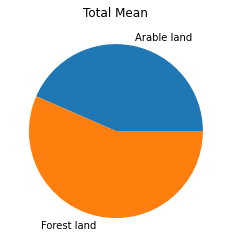

<Figure size 432x288 with 0 Axes>

In [28]:
'''comparing and plotting the total mean of both datasets'''
x = mean_total_arb
y = mean_total_frst
plot = [x,y]
names = ['Arable land','Forest land']
plt.pie(plot, labels=names)
plt.title('Total Mean')
plt.figure()
plt.show()

# Comparing and visualising variance of both datasets

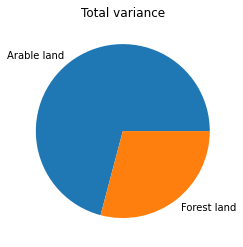

<Figure size 432x288 with 0 Axes>

In [20]:
'''comparing and plotting the total variance of both datasets'''
x = var_total_arb
y = var_total_frst
plot = [x,y]
names = ['Arable land','Forest land']
plt.pie(plot, labels=names)
plt.title('Total variance')
plt.figure()
plt.show()

# Standard Deviation and its visualisation

In [35]:
#standard deviation for selected counties 
std_arb = arb_land.std(axis=1)
std_frst = frst_land.std(axis=1)       

Arable land area

In [26]:
'''standard deviation of arable land area of selected countries in descending order'''
std_arb
std_arb.sort_values(ascending=False)

economy
ITA    2.073494
MDV    1.601917
MEX    0.776556
ZAF    0.553452
IND    0.527792
BEL    0.475618
AUS    0.444337
SRB    0.363506
CHL    0.232682
CAN    0.144892
DEU    0.136095
CHN    0.084651
dtype: float64

In [24]:
'''total mean of the standard deviation'''
mean = std_arb.mean()
mean

0.6179159025230573

Forest land area

In [25]:
'''standard deviation of forest land area of selected countries in descending order'''
std_frst
std_frst.sort_values(ascending=False)

economy
SRB    1.283474e+00
CHN    1.077884e+00
ITA    9.621025e-01
CHL    6.608288e-01
MEX    3.204553e-01
IND    3.117884e-01
BEL    2.670375e-01
ZAF    1.341910e-01
AUS    1.065407e-01
DEU    6.980387e-02
CAN    2.322631e-02
MDV    4.596760e-16
dtype: float64

In [27]:
'''total mean of the standard deviation'''
mean = std_frst.iloc[0:].mean()
mean

0.4347776440910276

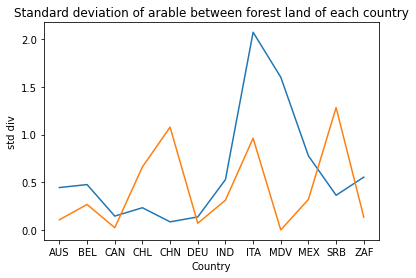

In [37]:
'''visualisation of standard deviation'''
std_arb = arb_land.std(axis=1)
std_frst = frst_land.std(axis=1)
plt.plot(std_arb, label='arable land')
plt.plot(std_frst, label='forest land')
plt.title('Standard deviation of arable between forest land of each country')
plt.xlabel('Country')
plt.ylabel('std div')
plt.savefig('std_country.png', bbox_inches='tight')
plt.show()


# Correlation

In [29]:
# Correlation between arable land and forest land
corr_dist = {}
for i in country_code:
    corr_dist[i] = np.corrcoef(arb_land.loc[i],frst_land.loc[i])[1][0]
corr_dist_sorted = sorted(corr_dist,key = corr_dist.get, reverse = True)
lists = sorted(corr_dist.items())
'''function for the counties with highest positive correlation'''
print('The countries with highest positive correlation are :')
for i in corr_dist_sorted:
    if corr_dist[i] >= 0.5:
        print(f'{country_name[i]} : {round(corr_dist[i],2)}')
print(' ') 
'''function for the counties with highest negative correlation'''
print('The countries with highest negative correlation are :')
for i in corr_dist_sorted:
    if corr_dist[i] <= -0.5:
        print(f'{country_name[i]} : {round(corr_dist[i],2)}')
print(' ')
'''function for the counties with low correlation'''
print('The countries with low correlation are :')
for i in corr_dist_sorted:
    if corr_dist[i] >= -0.5 and corr_dist[i] <= 0.5:
        print(f'{country_name[i]} : {round(corr_dist[i],2)}')

The countries with highest positive correlation are :
South Africa : 0.97
Canada : 0.96
Mexico : 0.83
Germany : 0.57
 
The countries with highest negative correlation are :
Belgium : -0.68
Chile : -0.81
Italy : -0.96
India : -0.98
 
The countries with low correlation are :
Austalia : 0.22
Maldives : 0.0
China : -0.06


# Time series and its Visualisation

In [30]:
'''to find the correlation using time series '''
time_corr = {}
for i in country_code:
    arb_cor = arb_land.loc[i].pct_change()
    frst_cor = frst_land.loc[i].pct_change() 
    x = arb_cor.corr(frst_cor).tolist()
    if x > 0 :
        time_corr[i] = x
    else: 
        time_corr[i] = 0

print('Time series correlation for both areas of each country is : ')
for i in time_corr:
    print(f'{country_name[i]} : {round(time_corr[i],2)}')

Time series correlation for both areas of each country is : 
Austalia : 0.29
China : 0.76
Canada : 0.72
Belgium : 0.07
India : 0.35
South Africa : 0
Chile : 0.4
Serbia : 0.33
Maldives : 0
Mexico : 0
Italy : 0
Germany : 0


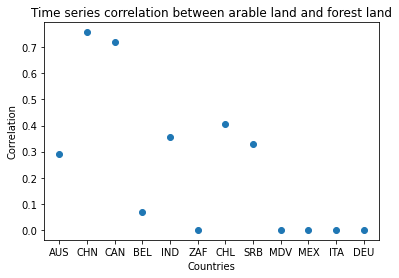

In [31]:
'''visualisation of time series correlation '''
plt.scatter(time_corr.keys(),time_corr.values())
plt.title('Time series correlation between arable land and forest land')
plt.ylabel('Correlation')
plt.xlabel('Countries')
plt.savefig('time_series_corr.png',bbox_inches='tight')
plt.show()